In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 254.0, test_images / 254.0

# Build a simple feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model with TensorBoard callback
model.fit(train_images, train_labels, epochs=5, callbacks=[tensorboard_callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2636 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1167 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0819 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0621 - accuracy: 0.9808
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0806 - accuracy: 0.9741
Test accuracy: 0.9740999937057495


In [2]:
tensorboard --logdir=./logs


SyntaxError: cannot assign to operator (3568829495.py, line 1)

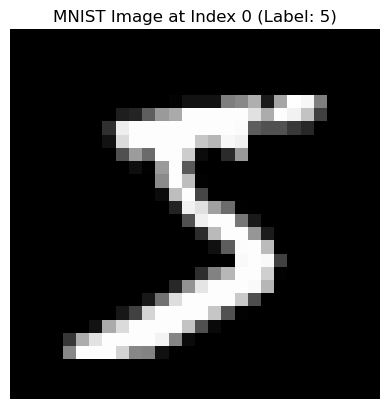

In [5]:
import matplotlib.pyplot as plt


# Extract the image at index 0
image = train_images[0]

# Display the image using Matplotlib
plt.imshow(image, cmap='gray')
plt.title(f"MNIST Image at Index 0 (Label: {train_labels[0]})")
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


In [6]:
def test_step(inputs, targets):
 predictions = model(inputs, training=False)
 loss = loss_fn(targets, predictions)
 logs = {}
 for metric in metrics:
     metric.update_state(targets, predictions)
     logs["val_" + metric.name] = metric.result()
 loss_tracking_metric.update_state(loss)
 logs["val_loss"] = loss_tracking_metric.result()
 return logs
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics() 

for inputs_batch, targets_batch in val_dataset:
 logs = test_step(inputs_batch, targets_batch) 
print("Evaluation results:") 
for key, value in logs.items():
 print(f"...{key}: {value:.4f}")

NameError: name 'val_images' is not defined